# Pokemon Exploratory Analysis

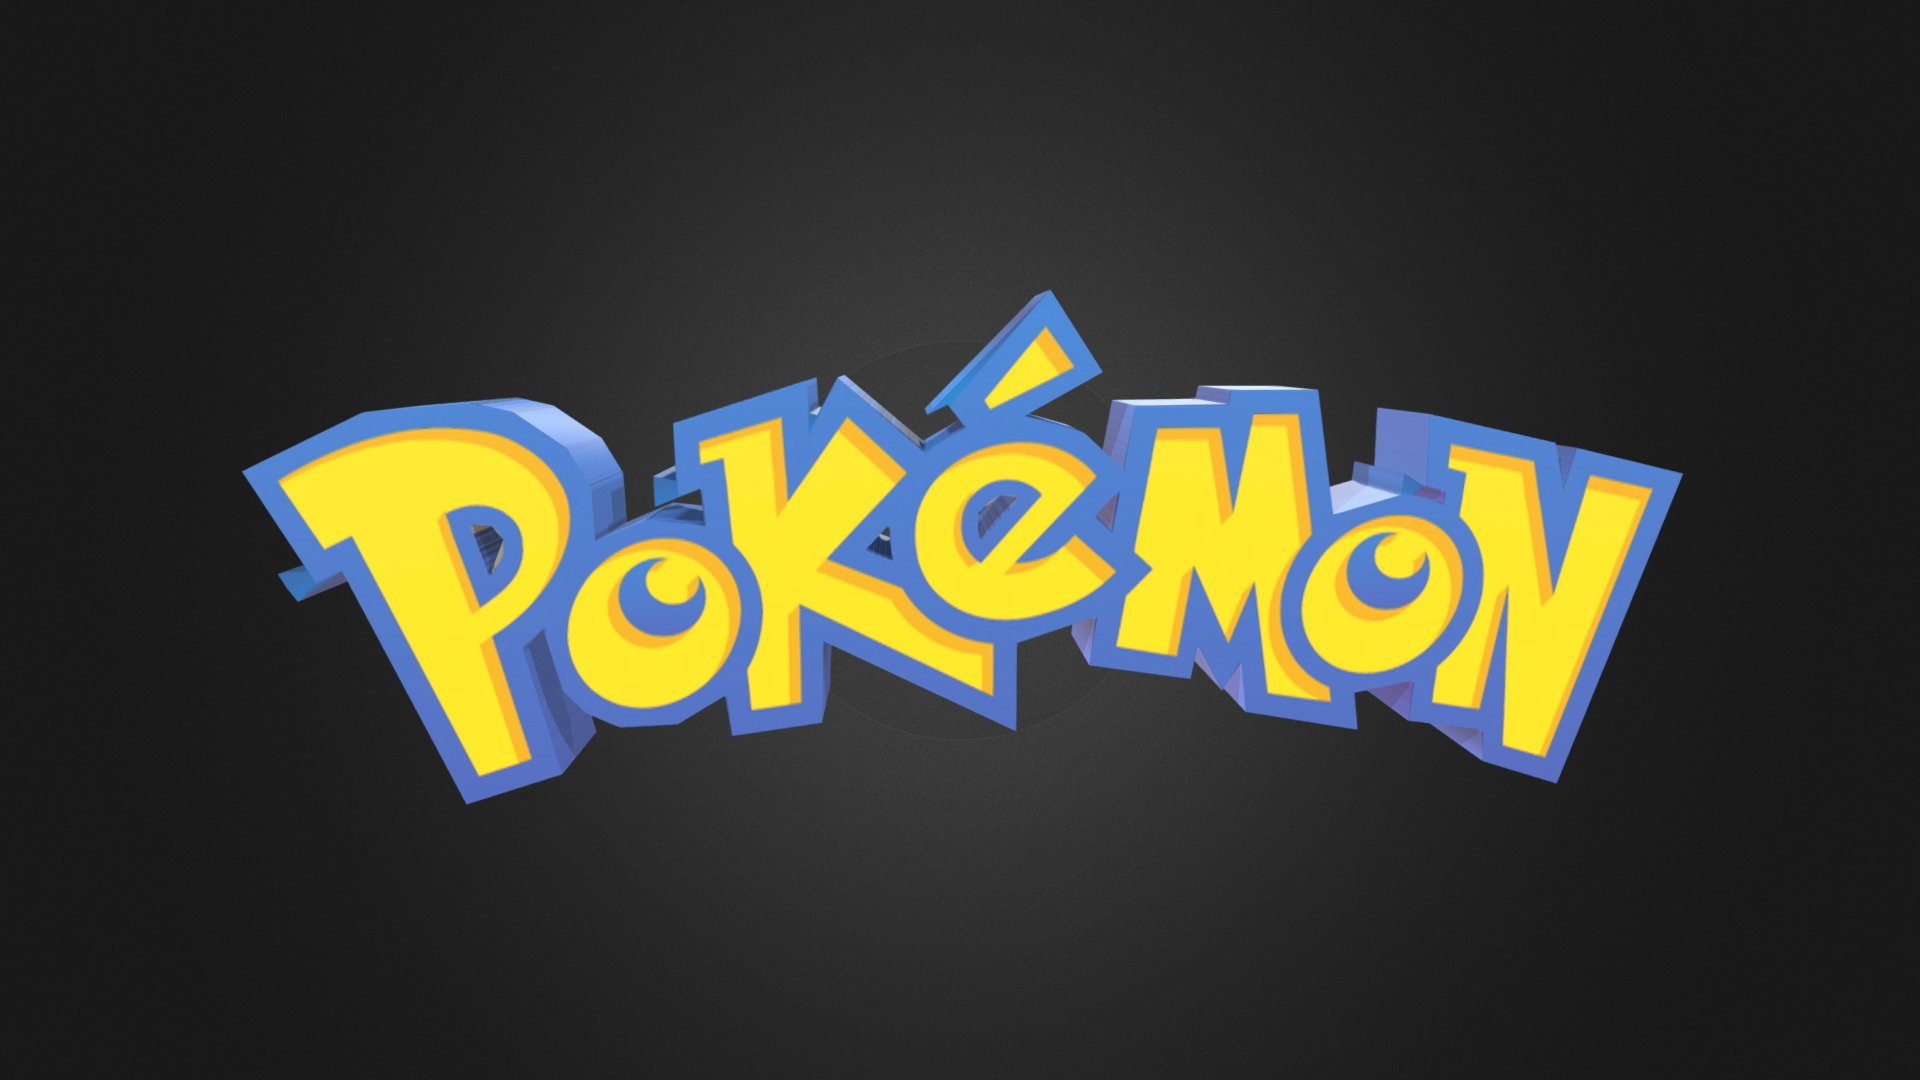
[Source](https://sketchfab.com/3d-models/pokemon-logo-befc8f22e2bc4f3185ed638a0beae46d)



In this project we'll analyse the data and find correlations between the Pokemons' attributes to answer the following questions:

1. How does height and weight of a Pokemon correlate with its various base stats?
1. What factors influence the Experience Growth and Egg Steps? Are these quantities correlated?
1. Which type is the strongest overall? Which is the weakest?
1. Which type is the most likely to be a legendary Pokemon?
1. Can we build a Pokemon dream team? A team of 6 Pokemon that inflicts the most damage while remaining relatively impervious to any other team of 6 Pokemon.

## Let's explore the data
### Import necessary modules

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

### Import data

In [2]:
data = pd.read_csv('pokemon.csv')
pd.set_option('display.max_columns', None) # To see all columns
data.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
pd.reset_option('max_columns')

### Data Cleaning

In [4]:
# number of columns
len(data.columns)

41

In [5]:
# There are 41 columns. Let's see their types
data.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

In [6]:
# In the dataset shown, the capture_rate column has numbers and its type is object, 
# thus there is something going on here. Let's analyse this column.
# We can do this in 2 different ways.

# First approach
data['capture_rate'].unique()

# Second approach. We'll show and use this one.
data['capture_rate'].value_counts()

45                          250
190                          75
255                          69
75                           61
3                            58
120                          55
60                           50
90                           38
30                           20
200                          19
225                          15
25                           13
180                          11
50                            7
235                           7
150                           7
100                           6
140                           6
127                           5
70                            4
55                            3
65                            3
125                           3
170                           2
220                           2
15                            2
130                           2
80                            2
205                           1
145                           1
35                            1
160     

As we can see, there is one non-numeric instance. Let's locate all the informacion about this instance.

In [7]:
pd.set_option('display.max_columns', None)
data.loc[data['capture_rate'] == '30 (Meteorite)255 (Core)']

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
773,['Shields Down'],0.5,1.0,1.0,2.0,1.0,1.0,0.5,0.5,1.0,1.0,0.0,2.0,0.5,0.5,1.0,2.0,2.0,2.0,100,6400,70,500,30 (Meteorite)255 (Core),Meteor Pokémon,60,1059860,0.3,60,Metenoメテノ,Minior,NaN,774,100,60,120,rock,flying,40.0,7,0


In [8]:
# This Pokemon has 2 different capture_Rate values.
# To keep things simple, we'll set its capture rate to 30 as follows:
data.loc[data['capture_rate'] == '30 (Meteorite)255 (Core)', 'capture_rate'] = 30

In [9]:
# Let's verify:
data.loc[773,'capture_rate']

30

In [10]:
# Now we can verify the capture_rate column's type
data.dtypes['capture_rate']

dtype('O')

In [11]:
# We can see that it's still of type object. Let's convert it to int.
# Since this column doesn't contain NaN values (verify it by using: data.info() ) it's safe to use
# the astype('int') method.
data['capture_rate'] = data['capture_rate'].astype('int')
data['capture_rate'].describe()

count    801.000000
mean      98.675406
std       76.248866
min        3.000000
25%       45.000000
50%       60.000000
75%      170.000000
max      255.000000
Name: capture_rate, dtype: float64

### Dealing with missing values

In [12]:
data.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


There are several missing values. Let's deal with them

In [13]:
# Get the numerical columns containing Nan
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

height_m
percentage_male
weight_kg


In [14]:
# Let's impute the missing values using the median of each column
for label,content in data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            data[label] = content.fillna(content.median())


In [15]:
# data.head()

In [16]:
# Now, let's get a full report using the Sweetviz module
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_html('analyze.html', open_browser=False)

                                             |                                             | [  0%]   00:00 ->…

Report analyze.html was generated.


A html file was generated. This can be opened in the browser.
The same file can find in this repo.

In [20]:
# from IPython.core.display import display, HTML